In [16]:
import numpy as np
import struct
import matplotlib.pyplot as plt

# 加载MNIST数据

In [17]:
def load_mnist(kind='train'):
    labels_path = kind+'-labels.idx1-ubyte'
    images_path =kind+'-images.idx3-ubyte' 
                    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

### 加载测试数据集和测试数据集

In [18]:
x_train,y_train= load_mnist()
x_test,y_test = load_mnist('t10k')

### 查看MNIST手写数据集

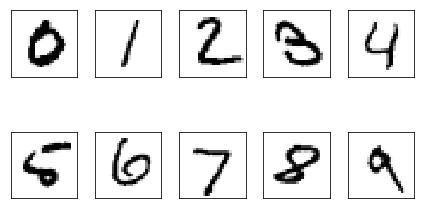

In [19]:
fig, ax = plt.subplots(nrows=2,ncols=5,sharex=True,sharey=True, )

ax = ax.flatten()
for i in range(10):
    img = x_test[y_test == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### 数据预处理

In [20]:
##归一化


x_train[x_train>0]=1
x_test[x_test>0]=1


##独热处理
Y = []
for i in y_test:
    y = np.zeros(10)
    y[i] = 1
    Y.append(y)

y_test = np.array(Y)


Y = []
for i in y_train:
    y = np.zeros(10)
    y[i] = 1
    Y.append(y)

y_train = np.array(Y)


x_train.shape

(60000, 784)

# BP神经网络

### sigmod 激活函数

In [21]:
##sigmod 激活函数
def sigmoid(t):
    return 1/(1 + np.exp(-t))

### 随机初始化矩阵函数

In [22]:
def random(rrange,size):
    a = rrange[0]
    b = rrange[1]
    return (b-a)*np.random.random(size=size)+a

### 初始化变量

In [23]:
input_num = 784 ##输入神经元数
hiden_num = 25 ##隐神经元数
output_num = 10 ##输出神经元数


##输入层到隐层的权值 input_num*hiden_num
Wih = random((-1/28,1/28),(input_num,hiden_num))
##隐层到输出层的权值 hiden_num*output_num
Who =random((-1/5,1/5),(hiden_num,output_num))

# ##隐层初始阈值
# Yh = np.random.random(size=(hiden_num,1))
# ##输出层初始阈值
# Yo = np.random.random(size =(output_num,1))

##输入层
Li =  np.zeros((input_num,1))
##隐层
Lh =  np.zeros((hiden_num,1))
##输出层
Lo =  np.zeros((output_num,1))

### 计算当前矩阵输出函数

In [24]:
def output(Li):
    for i in range(hiden_num):
        for j in range(input_num):
            Lh[i] += Wih[j,i] * Li[j]
        Lh[i]=sigmoid(Lh[i])
    
    for i in range(output_num):
        for j in range(hiden_num):
            Lo[i] += Who[j,i] * Lh[j]
        Lo[i] = sigmoid(Lo[i])

    return Lo
        

### 训练函数

In [25]:
def fit(x_train,y_train,yita = 0.5):
    
    for n in range(x_train.shape[0]):
        
        if n%100 == 0:
            print(n)
        Li = x_train[n]

        ##计算当前实际输出
        Z = output(Li)
       
       
        ##计算输出层神经元的梯度值
        g = np.zeros(output_num)
        for i in range(output_num):
            g[i] = Z[i]*(1-Z[i])*(y_train[n][i]-Z[i])


        ##计算隐层神经元的梯度值
        e = np.zeros(hiden_num)
        for i in range(hiden_num):
            temp = 0
            for j in range(output_num):
                temp += g[j]*Who[i,j]
            e[i] = Lh[i]*(1-Lh[i])*temp
        
        ##更新权值
        for i in range(hiden_num):
            for j in range(output_num):
                Who[i,j] +=yita*g[j]*Lh[i]    

        for i in range(input_num):
            for j in range(hiden_num):
                Wih[i,j] +=yita*e[j]*Li[i]


#         ##更新阈值
#         for i in range(output_num):
#             Yo[i] = Yo[i]-yita*g[i]

#         for i in range(hiden_num):
#             Yh [i] = Yh [i]-yita*e[i]
        

In [26]:
def predict(x_predict):
    result=[]
    for x in x_predict:
        Li = x
        result.append(output())
        
    return np.array(result)

In [27]:
fit(x_train[0:10000],y_train[0:10000])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


### 评价模型函数

In [30]:
def score(x_test,y_test):
    count = 0
    for i in range(x_test.shape[0]):
        n = np.random.randint(x_test.shape[0])
        Li = x_test[n]
        if y_test[n][np.argmax(output(Li))]== 1:
            count =count+1

    print(count)
    return count/x_test.shape[0]


In [31]:
score(x_test[0:1000],y_test[0:1000])

878


0.878